In [95]:
# Importing necessary packages
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Function that returns image size (height and width)
def getImgSize(img):
    height = img.shape[0]
    width  = img.shape[1]
    return(height, width)

In [9]:
def readGrayScaleImg(imgName):
    return cv2.imread(imgName, 0)

In [6]:
def convolution(img, kernel):
    # Getting image height and width
    height, width = getImgSize(img)

    # Getting kernel height and width
    k_height = np.size(kernel,0)
    k_width = np.size(kernel,1)

    # Getting step size
    s_height = int(k_height/2)
    s_width = int(k_width/2)

    # Initializing new image
    newImg = np.zeros((height, width,1))

    # Looping through image
    for i in range(s_height, height - s_height):
        for j in range(s_width, width - s_width):

            sum_value = 0
            img_kernel_shape = img[i - s_height:i + s_height, j - s_width: j + s_width]
            for i_k in range(0, k_height -1):
                for j_k in range(0, k_width -1):
                    sum_value = sum_value + (kernel[i_k,j_k] * img_kernel_shape[i_k,j_k])
            
            # Setting the sum_value to current pixel in new image
            newImg[i,j] = sum_value

    return newImg

In [49]:
def canny(img, lowThreshold, highThreshold, highThresholdValue):
    # Leemos la imagen de entrada en escala de grises
    #img = readGrayScaleImg(imgName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1 - Step, applying convolution
    kernel = np.array([[1,2,1],[2,4,2], [1,2,1]])
    kernel = (1/16) * kernel
    newImg = convolution(img, kernel)

    # Getting image height and width
    height, width = getImgSize(newImg)

    # Setting gradients matrix
    gradientImg = np.zeros((height, width, 1))

    # Setting stage matrix
    imgFase = np.zeros((height, width, 1))

    for i in range (0,height):
        for j in range(0,width):
            # Calculating derivatives dx y dy
            dx = 0
            dy = 0
            if i < height - 1:                
                dy = newImg[i+1,j] - newImg[i,j]
            if j < width - 1:
                dx = newImg[i, j+1] - newImg[i,j]

            # Calculating gradient's magnitud
            g = math.sqrt((dx*dx) + (dy*dy))
            gradientImg[i,j] = g

            # Calculating theta
            theta_radians = math.atan2(abs(dy), abs(dx))
            theta_degrees = math.degrees(theta_radians)
            imgFase[i,j] = theta_degrees

    # Initializing output matrix for NSM
    imgNSM = np.zeros((height, width, 1))
    for i in range (1,height-1):
        for j in range(1,width-1):

            # Initializing neighbors values
            previousNeighbor = 0
            nextNeighbor = 0

            if imgFase[i,j] >= 0 and imgFase[i,j] < 22.5:
                # Horizontal
                previousNeighbor = gradientImg[i,j-1]
                nextNeighbor = gradientImg[i,j+1]

            if imgFase[i,j] >= 22.5 and imgFase[i,j] < 45:
                # Diagonal
                previousNeighbor = gradientImg[i-1,j-1]
                nextNeighbor = gradientImg[i+1,j+1]

            if imgFase[i,j] >= 45 and imgFase[i,j] < 67.5:
                # Diagonal
                previousNeighbor = gradientImg[i-1,j-1]
                nextNeighbor = gradientImg[i+1,j+1]

            if imgFase[i,j] >= 67.5 and imgFase[i,j] < 90:
                # Vertical
                previousNeighbor = gradientImg[i+1,j]
                nextNeighbor = gradientImg[i-1,j]

            if imgFase[i,j] >= 90 and imgFase[i,j] < 112.5:
                # Vertical
                previousNeighbor = gradientImg[i+1,j]
                nextNeighbor = gradientImg[i-1,j]

            if imgFase[i,j] >= 112.5 and imgFase[i,j] < 135:
                # Diagonal
                previousNeighbor = gradientImg[i+1,j-1]
                nextNeighbor = gradientImg[i-1,j+1]

            if imgFase[i,j] >= 135 and imgFase[i,j] < 157.5:
                # Diagonal
                previousNeighbor = gradientImg[i+1,j-1]
                nextNeighbor = gradientImg[i-1,j+1]

            if imgFase[i,j] >= 157.5 and imgFase[i,j] < 180:
                # Horizontal
                previousNeighbor = gradientImg[i,j-1]
                nextNeighbor = gradientImg[i,j+1]

            if imgFase[i,j] >= 180 and imgFase[i,j] < 202.5:
                # Horizontal
                previousNeighbor = gradientImg[i,j-1]
                nextNeighbor = gradientImg[i,j+1]

            if imgFase[i,j] >= 202.5 and imgFase[i,j] < 225:
                # Diagonal
                previousNeighbor = gradientImg[i-1,j-1]
                nextNeighbor = gradientImg[i+1,j+1]

            if imgFase[i,j] >= 225 and imgFase[i,j] < 247.5:
                # Diagonal
                previousNeighbor = gradientImg[i-1,j-1]
                nextNeighbor = gradientImg[i+1,j+1]

            if imgFase[i,j] >= 247.5 and imgFase[i,j] < 270:
                # Vertical
                previousNeighbor = gradientImg[i+1,j]
                nextNeighbor = gradientImg[i-1,j]

            if imgFase[i,j] >= 270 and imgFase[i,j] < 292.5:
                # Vertical
                previousNeighbor = gradientImg[i+1,j]
                nextNeighbor = gradientImg[i-1,j]

            if imgFase[i,j] >= 292.5 and imgFase[i,j] < 315:
                # Diagonal
                previousNeighbor = gradientImg[i+1,j-1]
                nextNeighbor = gradientImg[i-1,j+1]

            if imgFase[i,j] >= 315 and imgFase[i,j] < 337.5:
                # Diagonal
                previousNeighbor = gradientImg[i+1,j-1]
                nextNeighbor = gradientImg[i-1,j+1]

            if imgFase[i,j] >= 337.5 and imgFase[i,j] < 360:
                # Horizontal
                previousNeighbor = gradientImg[i,j-1]
                nextNeighbor = gradientImg[i,j+1]

            # Comparing neighbors values
            if gradientImg[i,j] < previousNeighbor or gradientImg[i,j] < nextNeighbor:
                imgNSM[i,j] = 0
            else:
                # Comparing against low and high threshold values
                if gradientImg[i,j] > highThreshold:
                    imgNSM[i,j] = highThresholdValue
                elif gradientImg[i,j] < lowThreshold:
                    imgNSM[i,j] = 0
                elif previousNeighbor > highThreshold or nextNeighbor > highThreshold:
                    imgNSM[i,j] = highThresholdValue
                else:
                    imgNSM[i,j] = 0

    return imgNSM

In [11]:
def imgSegmentation(img, nClusters):
  # Converting img to hsv
  img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV_FULL)

  imgReshaped = img.reshape((-1,3))
  imgReshaped = np.float32(imgReshaped)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1)
  clusters = nClusters
  ret, label, center = cv2.kmeans(imgReshaped, clusters, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))
  return res2

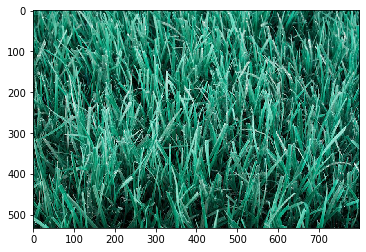

In [91]:
img = cv2.imread('image3.jpg')
plt.imshow(img)
plt.show()

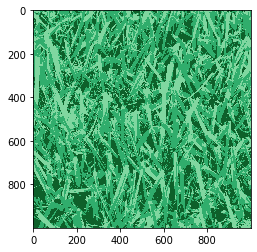

In [88]:
img = imgSegmentation(img,3)
plt.imshow(img)
plt.show()

In [92]:
# Loading image
img = canny(img, 5, 15, 255)

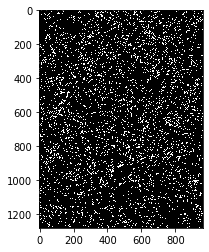

In [85]:
newCannyImg = np.zeros((img.shape[0], img.shape[1], 3), np.int32)
newCannyImg[:,:,0] = img[:,:,0]
newCannyImg[:,:,1] = img[:,:,0]
newCannyImg[:,:,2] = img[:,:,0]

plt.imshow(newCannyImg)
plt.show()

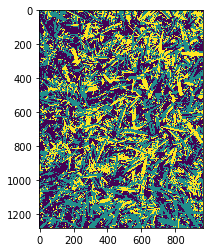

In [81]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

Se encontraron 20021 hojas de grama


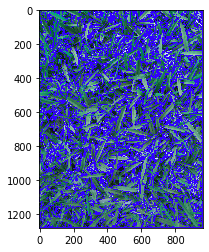

In [86]:
# Buscamos los contornos
_, contours, hierarchy = cv2.findContours(cv2.convertScaleAbs(img.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mostrar el número de contornos encontrados
print("Se encontraron {} hojas de grama".format(len(contours)))

img_original = cv2.imread('image_1.jpg')
cv2.drawContours(img_original, contours,-1, (50,0, 255), 2)
plt.imshow(img_original)
plt.show()

# INTENTO 2

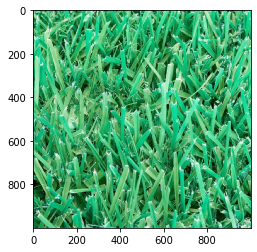

In [154]:
img = cv2.imread('image1.jpg')
img = cv2.GaussianBlur(img,(7,7),0)
plt.imshow(img)
plt.show()

In [155]:
# Reshaping image to a list of pixels
imgReshaped = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

# Using k-means with our list of pixels
clusters = KMeans(n_clusters = 3, random_state = 30)
clusters.fit(imgReshaped)
clusteredImg = np.reshape(np.array(clusters.labels_, dtype=np.uint8), (img.shape[0], img.shape[1]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


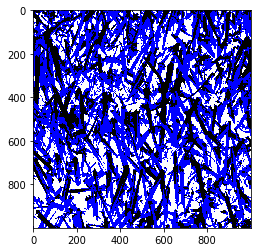

In [156]:
imgSalida = np.zeros((clusteredImg.shape[0], clusteredImg.shape[1], 3))

for i in range(clusteredImg.shape[0]):
  for j in range(clusteredImg.shape[1]):
    cluster = clusteredImg[i,j]
    newRedPixel = 0
    newGreenPixel = 0
    newBluePixel = 0
        
    if cluster == 0: # black
      newRedPixel = 0
      newGreenPixel = 0
      newBluePixel = 0
    elif cluster == 1: # white
      newRedPixel = 255
      newGreenPixel = 255
      newBluePixel = 255
    elif cluster == 2: # blue
      newRedPixel = 255
      newGreenPixel = 0
      newBluePixel = 0
      
    imgSalida[i,j] = [newBluePixel, newGreenPixel, newRedPixel]

plt.imshow(imgSalida)
plt.show()

In [159]:
def ScanByRow(img, color):
    # This function reads row by row the image of grass leaves.
    # It counts how many transitions of color are in each row.
    # Each black line (pixel) represents a border of a leave if the resolution is good, otherwise each line represents a leaf.
    # It compares the number of transitions of current line and compares it with the number of transitions of previous line.
    # If the current line has less number than the previous, it means that we finished reading 1 or more leaves.
    # If the current line has a greater number than the previous, it means that we started reading 1 or more leaves.
    # The counter of leaves then increments in (previous-current)/widthThreshold.
    # widthThreshold is manually set based on resolution of image.  It represents the line thickness.
    #   If each leaf is big enough in the image then threshold is about 2-4 pixels.
    #   If each leaf is small in the image, then thresold is about 0-1 pixels.


    #black = 0  # black color in binarized image
    #white = 255 # white color in binarized image
    currLineChanges = 0 # transition number of current line
    prevLineChanges = 0 # transition number of previous line
    leaves = 0 # leaves count in the image
    colorPixelsInARow = 0 # number of black pixels read in a row in the same line
    #widthThreshold = 6 # minimum number of pixels that will represent the border of a leaf
    #bordersByLeaf = 2 # if the image shows perfect leaves, this number should be 2, otherwise 1

    height, width = getImgSize(img)
    
     

    for i in range(0, height, step):
        prevColor = img[i,0]  
        for j in range(width):
            currPixel = img[i,j]
            
            if currPixel.all() == color.all():
                colorPixelsInARow += 1

            if prevColor.all() != currPixel.all():
                if currPixel.all() != color.all() and colorPixelsInARow >= widthThreshold: 
                    currLineChanges += 1
                if currPixel.all() == black.all():
                    colorPixelsInARow = 1
                    currLineChanges += 1
                
                prevColor = currPixel

                
        if prevLineChanges > currLineChanges:
            leaves += prevLineChanges - currLineChanges

        #print("Line: ", i,"... changes =", currLineChanges, " - leaves:", leaves/bordersByLeaf)
        prevLineChanges = currLineChanges
        currLineChanges = 0
    print(leaves/bordersByLeaf)
    return (leaves)

In [160]:
color = np.array([255,0,0])
leaves = test4(imgSalida,color)
print('Total grass: ', leaves)

570.5
Total grass:  1141
